In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from astropy.io import fits

In [3]:
%matplotlib inline

In [4]:
plt.style.use('court.mplstyle')

In [5]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,e_l1_vis,l2_vis,e_l2_vis,l3_vis,e_l3_vis,contamination_flag,crowdsap,RUWE,eff_obs_time,epsilon_collapsed
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,0.08,0.89,0.08,0.07,0.02,2,0.9980,0.957,110.0790,0.877934
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,0.09,0.42,0.05,0.08,0.08,2,1.0000,0.836,106.8120,0.860558
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,0.05,0.48,0.05,0.04,0.02,0,0.9971,2.542,117.4554,0.844961
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,0.14,0.55,0.07,0.20,0.04,0,0.9998,0.896,115.0200,0.876506
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,0.08,0.61,0.04,0.10,0.03,2,0.9952,0.936,86.7024,0.927727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,0.07,0.67,0.07,0.15,0.03,0,0.9996,6.019,93.9600,0.947856
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,0.47,0.75,0.15,0.18,0.06,2,0.9844,1.021,49.9500,1.002639
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,0.07,0.66,0.07,0.07,0.02,1,0.9930,0.979,117.4518,0.923077
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,0.12,0.58,0.07,0.13,0.02,0,0.9990,1.026,116.5266,1.106711


In [6]:
keck_data = pd.read_csv('../datatables/keck_data.csv')
keck_data

,KIC,numax,delta_nu,mass,Teff,logg,[Fe/H],adopt_flag,Kpmag,ra,dec,Teff_specmatch,logg_specmatch,feh_specmatch,vsini_specmatch,RV
0,3347458,40.291621,3.362861,4.958121,4863.000,2.5250,0.1650,apogee,10.30,292.77283,38.432480,4930.0,2.612985,0.320,4.297755,-54.42
1,8378545,47.769061,3.966159,4.432115,4984.000,2.9515,0.2400,avg,11.78,296.26709,44.371861,4960.0,2.712371,0.360,9.881992,NaN
2,5978324,48.776551,4.072667,4.265973,5051.000,2.7010,-0.0980,apogee,10.96,296.65195,41.222080,5036.0,2.993691,-0.080,5.309492,NaN
3,4756133,80.362852,5.998605,4.366603,5186.000,3.0140,0.0910,apogee,10.58,294.38312,39.844940,5024.0,3.110776,0.260,5.233387,NaN
4,7175316,41.488007,3.730429,3.524354,5007.000,2.5540,-0.0400,jie,9.00,281.97849,42.744141,4933.0,2.658837,0.330,4.728579,NaN
5,6599955,75.711091,5.870093,4.213744,5361.000,2.7690,0.1250,lamost,11.62,289.91006,42.086189,5263.0,2.925304,0.250,9.122755,NaN
6,3955502,24.714563,2.516171,3.720004,5052.000,2.4730,-0.0200,avg,12.27,291.83844,39.019402,4966.0,2.535091,0.280,9.505160,NaN
7,8037930,54.421681,4.776809,3.041234,5084.000,2.6860,0.2300,jie,13.45,294.91647,43.893661,4904.0,2.644786,0.300,4.212158,NaN
8,8569885,44.927632,4.024211,3.696699,5210.000,2.7400,0.1100,avg,9.04,295.49878,44.648548,5024.0,2.528742,0.280,7.814024,NaN
9,11518639,56.149591,4.610577,4.258156,5198.000,2.6560,-0.0100,jie,13.87,296.85648,49.456490,4934.0,2.701435,0.330,5.212670,NaN


In [7]:
spectrum_i = fits.open('/Users/ccra8514/Desktop/rj525.240.fits')

In [8]:
spectrum_i.info()

Filename: /Users/ccra8514/Desktop/rj525.240.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     722   (4021, 16)   float32   
  1                1 ImageHDU         7   (4021, 16)   float32   
  2                1 ImageHDU         7   (4021, 16)   float64   


In [9]:
spectrum_i[0].header

SIMPLE  =                    T / Written by IDL:  Tue Aug 15 09:19:41 2023      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4021 /Number of positions along axis 1                
NAXIS2  =                   16 /Number of positions along axis 2                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                    0 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2023-08-15T11:02:22' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT BEGIN observation-specific keywords written by write_image              
COMMENT BEGIN keywords that 

In [10]:
flux = spectrum_i[0].data
flux_err = spectrum_i[1].data
wav = spectrum_i[2].data

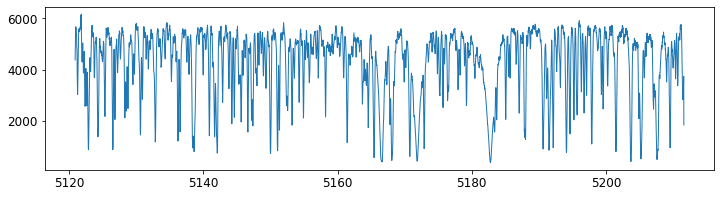

In [11]:
plt.figure(figsize=(12,3))
plt.plot(wav[2],flux[2])
plt.show()